In [1]:
import numpy as np
import pandas as pd
import scipy.integrate as sci
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation



In [2]:
x = pd.DataFrame(np.random.randn(700))

* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

In [3]:
x_dom = np.linspace(-4,4,150)

def multigauss(domain,x):
    std = x.std()
    size = len(x)
    
    return np.array([  scs.norm.pdf(domain,xx,1.06*std*size**(-0.2)) for xx in x.values])


mg = multigauss(x_dom,x)

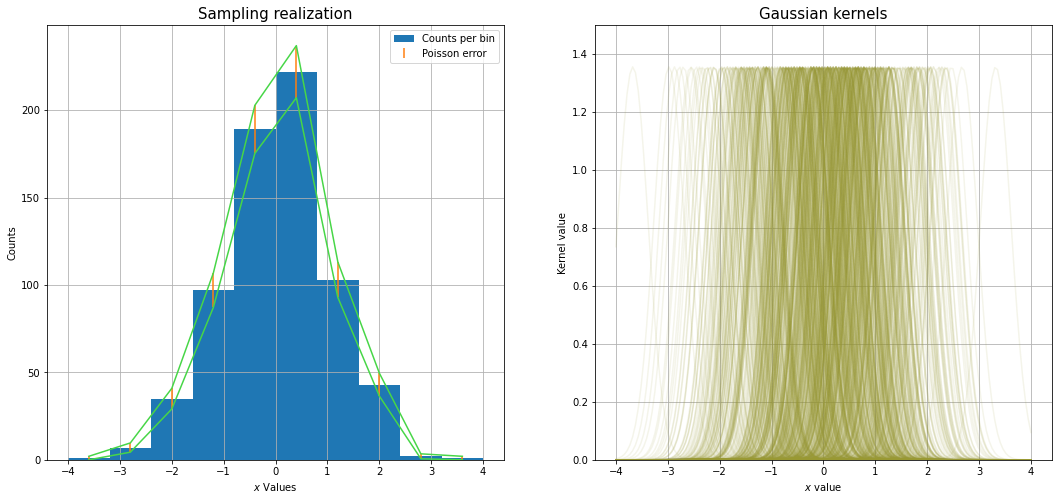

In [4]:
figure = plt.figure(figsize=(18,8))
axes1 = figure.add_subplot(1,2,1)
hy,hx,hpl = axes1.hist(x,bins=10,range=(-4,4),align="mid",label="Counts per bin")
hx = 0.5*(hx[:-1]+hx[1:])
axes1.errorbar(hx,hy,yerr=np.sqrt(hy),linestyle='',label="Poisson error")
axes1.plot(hx,hy+np.sqrt(hy),color=np.array([0.2,0.6,0.2])*1.4)
axes1.plot(hx,hy-np.sqrt(hy),color=np.array([0.2,0.6,0.2])*1.4)
axes1.set_ylabel("Counts")
axes1.set_xlabel("$x$ Values")
axes1.set_title("Sampling realization",size=15)
axes1.legend()
axes1.grid(True)

axes2 = figure.add_subplot(1,2,2)
for g in mg:
    axes2.plot(x_dom,g,alpha=0.1,color=[0.6,0.6,0.2])
axes2.set_xlabel("$x$ value")
axes2.set_ylabel("Kernel value")
axes2.set_title("Gaussian kernels",size=15)
axes2.grid(True)
axes2.set_ylim(0,1.5);
axes2.set_ylim(0,1.5);


* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

In [5]:
gmean = mg.sum(axis=0)
gmean = gmean/sci.trapz(gmean,x_dom)

hnorm = sci.trapz(hy,hx)

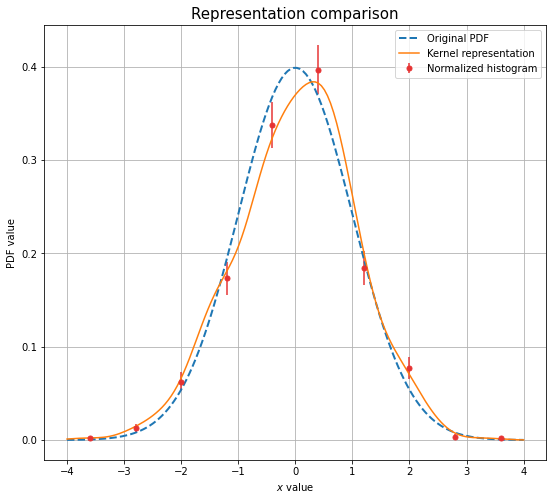

In [6]:
plt.figure(figsize=(9,8))
plt.errorbar(hx,hy/hnorm,yerr=np.sqrt(hy)/hnorm,color=[0.9,0.2,0.2],linestyle='',label="Normalized histogram",marker='.',markersize=10)
plt.plot(x_dom,scs.norm.pdf(x_dom,0,1),label="Original PDF",linestyle='--',linewidth=2)
plt.plot(x_dom,gmean,label="Kernel representation")
plt.legend()
plt.title("Representation comparison",size=15)
plt.xlabel("$x$ value")
plt.ylabel("PDF value")
plt.grid(True)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)

In [7]:
cluster0 = np.random.multivariate_normal(size=50000,mean=[0,30],cov=np.diag([400,170]))
cluster1 = np.random.multivariate_normal(size=5000,mean=[0,0],cov=np.diag([5,5]))
cluster2 = np.random.multivariate_normal(size=4000,mean=[0,5],cov=np.diag([3,3]))
cluster3 = np.random.multivariate_normal(size=1000,mean=[0,10],cov=np.diag([2,2]))
cluster4 = np.random.multivariate_normal(size=5000,mean=[0,15],cov=np.diag([4.5,4.5]))
cluster5 = np.random.multivariate_normal(size=5000,mean=[0,13],cov=np.diag([16.5,1.5]))
cluster6 = np.random.multivariate_normal(size=5000,mean=[-25,25],cov=np.diag([15,15]))
cluster7 = np.random.multivariate_normal(size=5000,mean=[25,25],cov=np.diag([15,15]))

* Display the dataset in a scatter plot marking the two categories with different marker colors.

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories4

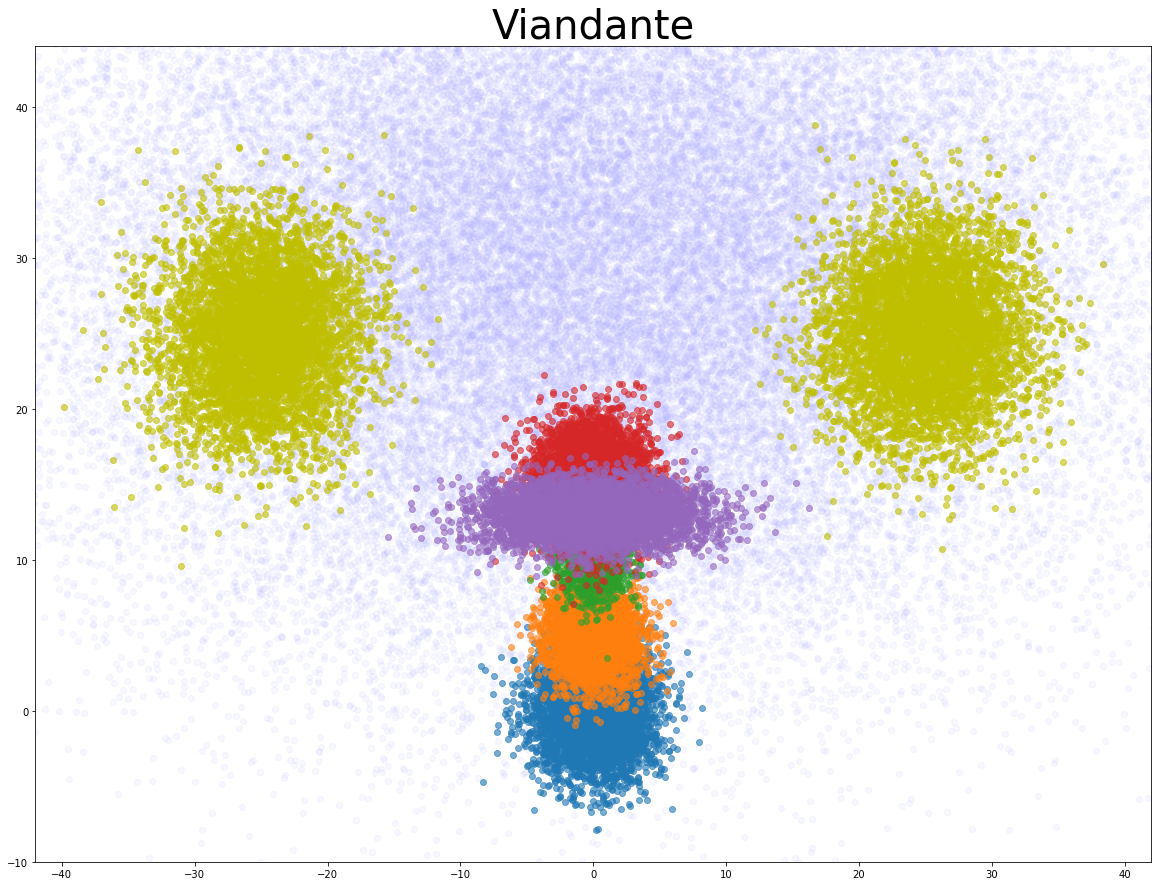

In [8]:
plt.figure(figsize=[20,15])
plt.scatter(cluster0[:,0],cluster0[:,1],alpha=0.1,color=[0.7,0.7,1])
plt.scatter(cluster1[:,0],cluster1[:,1],alpha=0.6)
plt.scatter(cluster2[:,0],cluster2[:,1],alpha=0.6)
plt.scatter(cluster3[:,0],cluster3[:,1],alpha=0.6)
plt.scatter(cluster4[:,0],cluster4[:,1],alpha=0.6)
plt.scatter(cluster5[:,0],cluster5[:,1],alpha=0.6)
plt.scatter(cluster6[:,0],cluster6[:,1],alpha=0.6,c='y')
plt.scatter(cluster7[:,0],cluster7[:,1],alpha=0.6,c='y')
plt.xlim([-42,42])
plt.ylim([-10,44])
plt.title("Viandante",size=40);

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.

* Inspect the dataset, you'll find two variables (features)
* Clean the sample by sabscting the entries (rows) with the variable "residual" in absolute value smaller than 2

In [9]:
! wget "https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy" -P "./06data"

--2020-11-17 23:23:32--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-11-17 23:23:33--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd404b86dfcff7a42fca45d8ec2.dl.dropboxusercontent.com/cd/0/inline/BDY1sZ7D4lFu-iV3CdlfRTUxsy8tKo-fFh9SB809Ni0baWDL0tgQIpYZmiQytpGNziF0v82vpdw8PyxEQA8TYQmck6Fg27WPmzQcPGdXS1rKAQ/file# [following]
--2020-11-17 23:23:33--  https://ucd404b86dfcff7a42fca45d8ec2.dl.dropboxusercontent.com/cd/0/inline/BDY1sZ7D4lFu-iV3CdlfRTUxsy8tKo-fFh9SB809Ni0baWDL0tgQIpYZmiQytpGNziF0v82vpdw8PyxEQA8TYQmck6Fg27WPmzQcPGdXS1rKAQ/file
R

In [10]:
# import data as a pd.DataFrame
data = pd.DataFrame(np.load("06data/residuals_261.npy",allow_pickle=True).item())

# cleanupdata
data_c = data[data["residuals"].abs()<2]
res = data_c["residuals"]
dist = data_c["distances"]
data_c

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 

In [11]:
slope, intercept = scs.linregress(data_c["residuals"],data_c["distances"])[0:2]

* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot

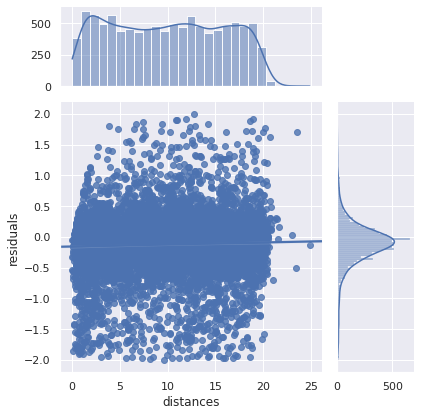

In [12]:
import seaborn as sns
# style must be one of white, dark, whitegrid, darkgrid, ticks

sns.set_theme()
sns.jointplot(x="distances", y="residuals", data=data_c,kind="reg", truncate=False,ratio=3,marginal_ticks=True);

* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the "residuals", estimated in slices (bins) of "distance"

In [13]:
Nbins = 15
h = 20/Nbins
x = np.arange(0,Nbins)*h+h/2

bin_idx = ((data_c["distances"]/h).astype(int))
data_c2 = data_c.join(bin_idx.to_frame('bin_idx'))

y = data_c2.groupby('bin_idx')['residuals'].mean()[0:Nbins]
erry = data_c2.groupby('bin_idx')['residuals'].std()[0:Nbins]

* Plot the profile plot on top of the scatter plot

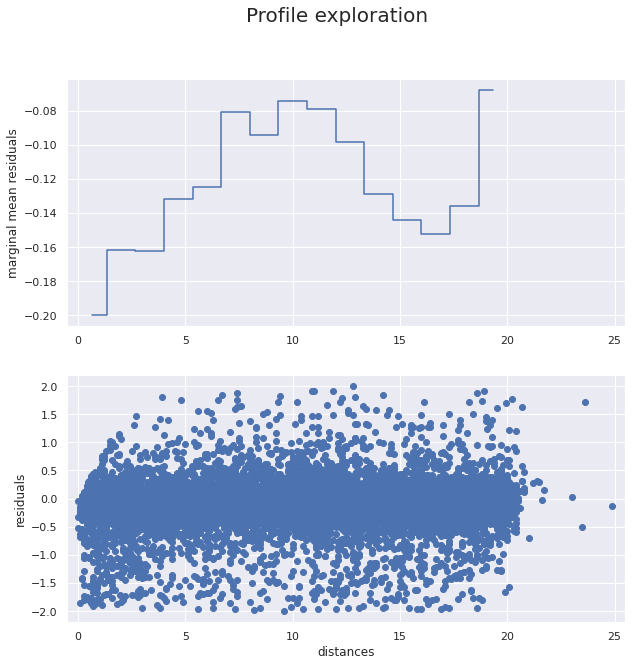

In [14]:
fig = plt.figure(figsize=[10,10])

axmain = fig.add_subplot(2,1,2)
axmain.scatter(data_c['distances'],data_c['residuals'])
axmain.set_xlim([-0.5,25.5])
axmain.set_xlabel('distances')
axmain.set_ylabel('residuals')

axprofile = fig.add_subplot(2,1,1)
axprofile.step(x,y,where='mid')
axprofile.set_xlim([-0.5,25.5])
axprofile.set_ylabel('marginal mean residuals');

fig.suptitle("Profile exploration",size=20);